<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>

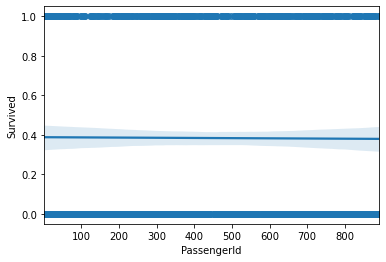

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

data = pd.read_csv("titanic-passengers.csv", sep=';')


data["Survived"] = data["Survived"].map({"Yes": 1, "No": 0}) 
data
import seaborn as sns 
sns.regplot(x='PassengerId',y='Survived',data=data)

In [35]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [47]:
data.columns
print(data['Cabin'])
data.dropna(axis=0,how='any',inplace=True)

0        NaN
1      F G73
2        NaN
3        NaN
4        B71
       ...  
886      NaN
887      NaN
888      NaN
889      NaN
890      NaN
Name: Cabin, Length: 891, dtype: object


In [48]:
print(data['Cabin'])

1      F G73
4        B71
16       C82
19       C93
26       B41
       ...  
862       F4
863      E17
865      B80
875      E63
881      C68
Name: Cabin, Length: 183, dtype: object


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

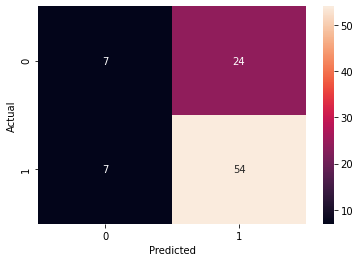

In [54]:

#features extraction
x = data[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance



confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.23      0.31        31
           1       0.69      0.89      0.78        61

    accuracy                           0.66        92
   macro avg       0.60      0.56      0.54        92
weighted avg       0.63      0.66      0.62        92

